In [3]:
import numpy as np
iris_data = np.loadtxt('data/irisdata.txt', comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


In [5]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

In [17]:
cov_sep = 1/(n_obs-1) * np.dot(sep_l , sep_w)
print(f"Covariance between sepal length and sepal width: {cov_sep}")

Covariance between sepal length and sepal width: 17.61


<Figure size 640x480 with 0 Axes>

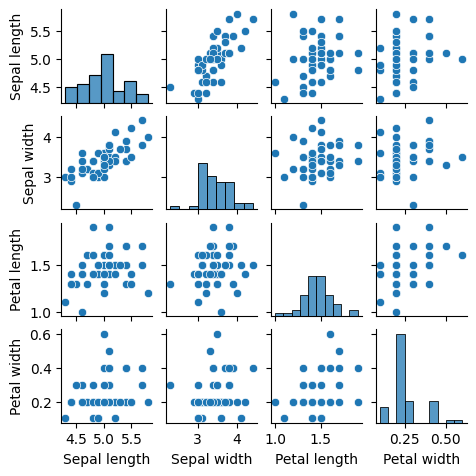

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
                             'Petal length', 'Petal width'])
sns.pairplot(d, height=1.2)
plt.show()

In [21]:
mn = np.mean(x, axis=0)
data = x - mn

#manually
cov_data = np.dot(data.T, data) / (n_obs - 1)
print(f"Covariance matrix formula: \n{cov_data}")

# Using numpy
c_x = np.cov(x, rowvar=False)
print(f"Covariance matrix numpy: \n{c_x}")

Covariance matrix formula: 
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
Covariance matrix numpy: 
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


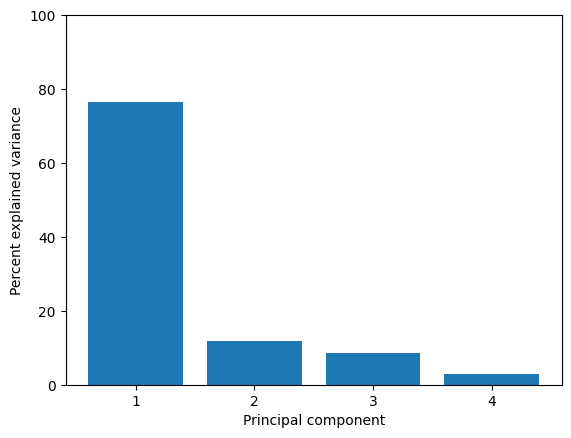

In [27]:
values, vectors = np.linalg.eig(c_x) # Here c_x is your covariance matrix.

v_norm = values / values.sum() * 100
plt.bar([1,2,3,4],v_norm)
plt.xlabel("Principal component")
plt.ylabel("Percent explained variance")
plt.xticks([1,2,3,4])
plt.ylim([0, 100])

plt.show()

<Figure size 640x480 with 0 Axes>

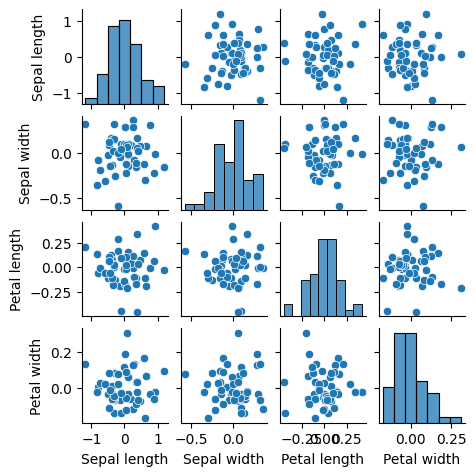

In [34]:
pc_proj = vectors.T.dot(data.T)
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d_proj = pd.DataFrame(pc_proj.T, columns=['Sepal length', 'Sepal width',
                             'Petal length', 'Petal width'])
sns.pairplot(d_proj, height=1.2)
plt.show()


<Figure size 640x480 with 0 Axes>

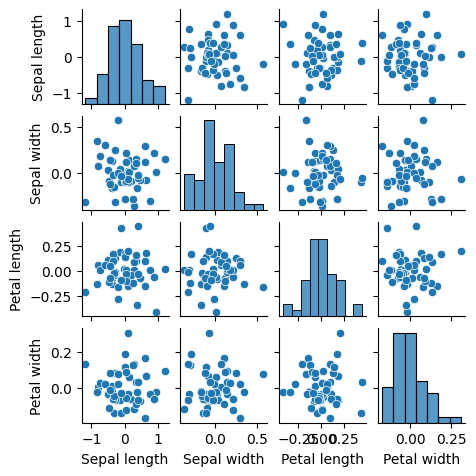

In [39]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d_sk = pd.DataFrame(data_transform, columns=['Sepal length', 'Sepal width',
                             'Petal length', 'Petal width'])
sns.pairplot(d_sk, height=1.2)
plt.show()